## General Case (Empirical)

$$
LVR =  \sum_{i=1}^{n} a_i \cdot (p_i - q_i)
$$

$a_i$ : Amount of Token Sold

$p_i$ : Market Price

$q_i$ : AMM Price

In [1084]:
from web3 import Web3

web3 = Web3(Web3.HTTPProvider("https://eth.llamarpc.com"))

def get_block_timestamp(block_number):
    block = web3.eth.get_block(block_number)
    
    if block:
        timestamp = block['timestamp']
        return timestamp
    else:
        return None

# Example usage
block_number = 17619769
timestamp = get_block_timestamp(block_number)
datetime = pd.to_datetime(timestamp, unit='s')

if timestamp:
    print("Timestamp for block", block_number, ":", timestamp, "(", datetime, ")")
else:
    print("Failed to retrieve timestamp for block", block_number)


Timestamp for block 17619769 : 1688464115 ( 2023-07-04 09:48:35 )


In [1132]:
# function for retrieving item by block number
def get_item_by_block_number(df, block_number):
    return df[df['block_number'] == block_number]

## Getting Swap Data for the Pool

In [1146]:
# load swap data from csv

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load data
df = pd.read_csv('USDCETH_swap.csv', index_col=0)


In [1156]:
# from swaps, get all unique block_numbers and tell me if there are any missing
block_numbers = df['block_number'].unique()
block_numbers.sort()

# iterate through the block_numbers and check if there are in sequence, store the missing block numbers in a list
missing_block_numbers = []
for i in range(len(block_numbers) - 1):
    if block_numbers[i] + 1 != block_numbers[i + 1]:
        missing_block_numbers.append(block_numbers[i] + 1)

In [1159]:
print("Missing block numbers:", len(missing_block_numbers))
print("Block numbers:", len(block_numbers))


Missing block numbers: 293795
Block numbers: 707760


In [1161]:
missing_block_numbers[-10:]

[17626275,
 17626281,
 17626283,
 17626289,
 17626291,
 17626297,
 17626305,
 17626309,
 17626313,
 17626334]

In [1151]:
get_item_by_block_number(df, 16308194)

,block_number,amount0,amount1,liquidity,tick,transaction_index,log_index,amount_token0,amount_token1,Price
chain,,,,,,,,,,


In [1085]:
swaps = df[-4000:]
swaps

,block_number,amount0,amount1,liquidity,tick,transaction_index,log_index,amount_token0,amount_token1,Price
chain,,,,,,,,,,
ethereum,17617053,-1.078215e+07,5.514634e+15,5.337044e+19,200532,55,117,-10.782147,0.005515,1956.326402
ethereum,17617054,1.000000e+09,-5.109481e+17,5.337044e+19,200532,114,192,1000.000000,-0.510948,1956.326402
ethereum,17617056,-1.956166e+09,1.000500e+18,5.337044e+19,200532,123,1257,-1956.166031,1.000500,1956.326402
ethereum,17617058,5.000000e+09,-2.554738e+18,5.337044e+19,200532,54,184,5000.000000,-2.554738,1956.326402
ethereum,17617065,-8.902776e+09,4.553413e+18,5.337044e+19,200532,146,302,-8902.776339,4.553413,1956.326402
...,...,...,...,...,...,...,...,...,...,...
ethereum,17626307,-3.997398e+09,2.064475e+18,4.804907e+19,200630,57,145,-3997.398083,2.064475,1937.248990
ethereum,17626308,1.457979e+09,-7.522283e+17,4.804907e+19,200630,76,119,1457.979055,-0.752228,1937.248990
ethereum,17626312,-2.601650e+10,1.343652e+19,4.804907e+19,200630,1,19,-26016.496670,13.436515,1937.248990


In [1086]:
# insert timestamp column
swaps['timestamp'] = swaps['block_number'].apply(get_block_timestamp)



/var/folders/lv/l4xn1q3s7jxgwb_811k8vqrh0000gn/T/ipykernel_38979/748277054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swaps['timestamp'] = swaps['block_number'].apply(get_block_timestamp)


In [1087]:
# save to csv
swaps.to_csv('USDCETH_swap_timestamp.csv')
swaps

,block_number,amount0,amount1,liquidity,tick,transaction_index,log_index,amount_token0,amount_token1,Price,timestamp
chain,,,,,,,,,,,
ethereum,17617053,-1.078215e+07,5.514634e+15,5.337044e+19,200532,55,117,-10.782147,0.005515,1956.326402,1688431127
ethereum,17617054,1.000000e+09,-5.109481e+17,5.337044e+19,200532,114,192,1000.000000,-0.510948,1956.326402,1688431139
ethereum,17617056,-1.956166e+09,1.000500e+18,5.337044e+19,200532,123,1257,-1956.166031,1.000500,1956.326402,1688431163
ethereum,17617058,5.000000e+09,-2.554738e+18,5.337044e+19,200532,54,184,5000.000000,-2.554738,1956.326402,1688431187
ethereum,17617065,-8.902776e+09,4.553413e+18,5.337044e+19,200532,146,302,-8902.776339,4.553413,1956.326402,1688431271
...,...,...,...,...,...,...,...,...,...,...,...
ethereum,17626307,-3.997398e+09,2.064475e+18,4.804907e+19,200630,57,145,-3997.398083,2.064475,1937.248990,1688543399
ethereum,17626308,1.457979e+09,-7.522283e+17,4.804907e+19,200630,76,119,1457.979055,-0.752228,1937.248990,1688543423
ethereum,17626312,-2.601650e+10,1.343652e+19,4.804907e+19,200630,1,19,-26016.496670,13.436515,1937.248990,1688543471


In [1116]:
# load swaps csv
swaps = pd.read_csv('USDCETH_swap_timestamp.csv', index_col=0)
swaps = swaps[:3500]
swaps

,block_number,amount0,amount1,liquidity,tick,transaction_index,log_index,amount_token0,amount_token1,Price,timestamp
chain,,,,,,,,,,,
ethereum,17617053,-1.078215e+07,5.514634e+15,5.337044e+19,200532,55,117,-10.782147,0.005515,1956.326402,1688431127
ethereum,17617054,1.000000e+09,-5.109481e+17,5.337044e+19,200532,114,192,1000.000000,-0.510948,1956.326402,1688431139
ethereum,17617056,-1.956166e+09,1.000500e+18,5.337044e+19,200532,123,1257,-1956.166031,1.000500,1956.326402,1688431163
ethereum,17617058,5.000000e+09,-2.554738e+18,5.337044e+19,200532,54,184,5000.000000,-2.554738,1956.326402,1688431187
ethereum,17617065,-8.902776e+09,4.553413e+18,5.337044e+19,200532,146,302,-8902.776339,4.553413,1956.326402,1688431271
...,...,...,...,...,...,...,...,...,...,...,...
ethereum,17624342,1.360666e+09,-7.015480e+17,4.721496e+19,200623,17,29,1360.665807,-0.701548,1938.605471,1688519627
ethereum,17624347,1.365655e+11,-7.040736e+19,4.721496e+19,200621,2,4,136565.479693,-70.407364,1938.993211,1688519687
ethereum,17624348,1.566443e+11,-8.074776e+19,4.721496e+19,200620,2,5,156644.289661,-80.747763,1939.187111,1688519699


# Aggregate the trades over a block

In [1176]:
# Load the swaps dataframe from your data source
df = pd.read_csv('USDCETH_swap.csv', index_col=0)

# Group the dataframe by 'block_number' and aggregate the columns
grouped_df = df.groupby('block_number').agg({
    'amount_token0': 'sum',
    'amount_token1': 'sum',
    'Price': 'mean'
}).reset_index()

# Print the resulting dataframe
grouped_df


,block_number,amount_token0,amount_token1,Price
0,16308193,-5015.912763,4.197470,1195.653680
1,16308195,74.928651,-0.062640,1195.653680
2,16308196,-57588.551150,48.193411,1195.653680
3,16308197,2413.715859,-2.017845,1195.653680
4,16308199,-5425.627425,4.540339,1195.653680
...,...,...,...,...
707755,17626307,-3997.398083,2.064475,1937.248990
707756,17626308,1457.979055,-0.752228,1937.248990
707757,17626312,-26016.496670,13.436515,1937.248990
707758,17626333,-2548.353650,1.316144,1937.248990


checking that the aggregation is done correctly

In [1168]:
sample_block = grouped_df[grouped_df['block_number'] == 17618525]
sample_block

,block_number,amount_token0,amount_token1,Price
638,17618525,-879954.018421,453.791249,1946.915912


In [1169]:
# get all items for 17617056
sample = swaps[swaps['block_number'] == 17618525]
sample

,block_number,amount0,amount1,liquidity,tick,transaction_index,log_index,amount_token0,amount_token1,Price,timestamp
chain,,,,,,,,,,,
ethereum,17618525,-5.133470e+12,2.635687e+21,4.552999e+19,200596,0,19,-5.133470e+06,2635.686936,1943.846516,1688449019
ethereum,17618525,-1.485077e+12,7.650000e+20,4.480720e+19,200611,1,23,-1.485077e+06,765.000000,1940.933077,1688449019
ethereum,17618525,5.133470e+12,-2.636945e+21,4.553934e+19,200560,2,44,5.133470e+06,-2636.944659,1950.856623,1688449019
ethereum,17618525,6.051226e+11,-3.099510e+20,4.544034e+19,200554,9,80,6.051226e+05,-309.951028,1952.027430,1688449019


In [1179]:
get_block_timestamp(17285000)

1684395467

In [1321]:
# Get data from 17285000 to 17631700 as that is when Range launched
block_data = grouped_df[grouped_df['block_number'] >= 17285000]
# create a column called timestamp. block 17285000 is 1684395467. Every subsequent block is 12 seconds
block_data['timestamp'] = block_data['block_number'].apply(lambda x: 1684395467 + (x - 17285000) * 12)
block_data

/var/folders/lv/l4xn1q3s7jxgwb_811k8vqrh0000gn/T/ipykernel_38979/3182323320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_data['timestamp'] = block_data['block_number'].apply(lambda x: 1684395467 + (x - 17285000) * 12)


,block_number,amount_token0,amount_token1,Price,timestamp
563904,17285004,10000.000000,-5.485844,1822.067754,1684395515
563905,17285005,-185020.955304,101.600889,1822.067754,1684395527
563906,17285007,289204.492739,-158.626310,1822.614429,1684395551
563907,17285009,-122227.927301,67.229540,1822.158876,1684395575
563908,17285010,146873.624753,-80.549997,1822.796691,1684395587
...,...,...,...,...,...
707755,17626307,-3997.398083,2.064475,1937.248990,1688491151
707756,17626308,1457.979055,-0.752228,1937.248990,1688491163
707757,17626312,-26016.496670,13.436515,1937.248990,1688491211
707758,17626333,-2548.353650,1.316144,1937.248990,1688491463


In [1322]:
# add a column called AMM_price by dividing amount_token0 by amount_token1
block_data['AMM_price'] = block_data['amount_token0'] / block_data['amount_token1'] *-1
block_data_sample = block_data
block_data_sample

/var/folders/lv/l4xn1q3s7jxgwb_811k8vqrh0000gn/T/ipykernel_38979/226728853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_data['AMM_price'] = block_data['amount_token0'] / block_data['amount_token1'] *-1


,block_number,amount_token0,amount_token1,Price,timestamp,AMM_price
563904,17285004,10000.000000,-5.485844,1822.067754,1684395515,1822.873505
563905,17285005,-185020.955304,101.600889,1822.067754,1684395527,1821.056461
563906,17285007,289204.492739,-158.626310,1822.614429,1684395551,1823.181113
563907,17285009,-122227.927301,67.229540,1822.158876,1684395575,1818.068783
563908,17285010,146873.624753,-80.549997,1822.796691,1684395587,1823.384605
...,...,...,...,...,...,...
707755,17626307,-3997.398083,2.064475,1937.248990,1688491151,1936.278055
707756,17626308,1457.979055,-0.752228,1937.248990,1688491163,1938.213459
707757,17626312,-26016.496670,13.436515,1937.248990,1688491211,1936.253244
707758,17626333,-2548.353650,1.316144,1937.248990,1688491463,1936.227091


In [1286]:
# get start and end timestamps in swaps

start_timestamp = int(block_data_sample['timestamp'].min() * 1000)
end_timestamp = int(block_data_sample['timestamp'].max() * 1000)
print(start_timestamp, end_timestamp)

# convert the timestamps into datetime, singapore time
start_datetime = pd.to_datetime(start_timestamp, unit='ms') + pd.Timedelta(hours=8)
end_datetime = pd.to_datetime(end_timestamp, unit='ms') + pd.Timedelta(hours=8)

print(start_datetime, "to", end_datetime)

# get the difference between the two timestamps in hours
diff = (end_timestamp - start_timestamp) / 1000 / 60 / 60
print(diff,"hours")

1684395515400 1688525656800
2023-05-18 15:38:35.400000 to 2023-07-05 10:54:16.800000
1147.2615 hours


In [1257]:
import requests
import random

# List of User-Agent strings to simulate different devices
user_agents = [
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36",
    "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.81 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.81 Safari/537.36",
    "Mozilla/5.0 (Windows NT 6.1; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36",
    "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_12_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36"
]

# Helper function to get binance klines over a period longer than 1000 seconds
def get_binance_klines(symbol, startTime, endTime):
    url = "https://api.binance.com/api/v3/uiKlines"
    params = {
        "symbol": symbol,
        "interval": "1s",
        "startTime": startTime,
        "endTime": 1688535695000,
        "limit": "1000"
    }

    data = []

    while True:
        # Randomly select a User-Agent from the list
        user_agent = random.choice(user_agents)
        
        headers = {
            "User-Agent": user_agent
        }
        
        response = requests.get(url, params=params, headers=headers)

        if response.status_code == 200:
            batch_data = response.json()
            data.extend(batch_data)

            if len(batch_data) < 1000:
                break

            # Update the startTime parameter for the next batch
            params["startTime"] = str(int(batch_data[-1][0]) + 1)
        else:
            print("Request failed with status code:", response.status_code)
            break

    return data


In [1287]:
response = get_binance_klines("ETHUSDC", start_timestamp, end_timestamp)
klines_data = pd.DataFrame(response, columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

# create new datafram keeping only open_time, close_time, and close and divide open_time and close_time by 1000
klines_data = klines_data[['open_time', 'close_time', 'close']]
klines_data['open_time'] = klines_data['open_time'] / 1000
klines_data['close_time'] = klines_data['close_time'] / 1000

# convert open_time and close_time to int
klines_data['open_time'] = klines_data['open_time'].astype(int)
klines_data['close_time'] = klines_data['close_time'].astype(int)

klines_data

,open_time,close_time,close
0,1684395516,1684395516,1822.54000000
1,1684395517,1684395517,1822.54000000
2,1684395518,1684395518,1822.54000000
3,1684395519,1684395519,1822.54000000
4,1684395520,1684395520,1822.54000000
...,...,...,...
4140175,1688535691,1688535691,1935.43000000
4140176,1688535692,1688535692,1935.43000000
4140177,1688535693,1688535693,1935.43000000
4140178,1688535694,1688535694,1935.43000000


In [1288]:
# save the klines data to csv indicating time stamp rnage
klines_data.to_csv(f'ETHUSDC_klines_{start_timestamp}_{end_timestamp}.csv')

In [1323]:
# merge swaps and klines_data on timestamp and close_time
merged = pd.merge(block_data_sample, klines_data, left_on='timestamp', right_on='close_time')

# drop open_time and close_time and liquidity and tick and transaction_index and log_index
merged = merged.drop(columns=['open_time', 'close_time'])

# calculate AMM price from amount_token0 divided by amount_token1
merged['AMM_price'] = merged['amount_token0'] / merged['amount_token1'] * -1

merged['close'] = merged['close'].astype(float)

# Create a column called action which is labelled either buy or sell depending on whether amount_token1 is positive or negative
merged['pool_action'] = np.where(merged['amount_token1'] > 0, 'buy', 'sell')

# Trader action is the opposite of pool action
merged['trader_action'] = np.where(merged['pool_action'] == 'buy', 'sell', 'buy')

# calculate LVR amount_token1*-1 * (close - AMM_price)
merged['LVR'] = merged['amount_token1'] * -1 * (merged['close'] - merged['AMM_price'])

# create a column for cumulative LVR sum
merged['cum_LVR'] = merged['LVR'].cumsum()

# remove outliers where the amount_token0 or amount_token1 is 0
merged = merged[merged['amount_token0'] != 0]

# order the columns in this order timestamp, block_numner, transaction_index, price, amm_price, close, pool_action, trader_action, LVR, cum_LVR
merged = merged[['timestamp', 'block_number', 'Price', 'AMM_price', 'close', 'amount_token0', 'amount_token1','pool_action', 'trader_action', 'LVR', 'cum_LVR']]

# rename close to Close_price
merged = merged.rename(columns={'close': 'Close_price'})

In [1324]:
merged

,timestamp,block_number,Price,AMM_price,Close_price,amount_token0,amount_token1,pool_action,trader_action,LVR,cum_LVR
0,1684395527,17285005,1822.067754,1821.056461,1822.54,-185020.955304,101.600889,buy,sell,-150.728923,-1.507289e+02
1,1684395551,17285007,1822.614429,1823.181113,1823.85,289204.492739,-158.626310,sell,buy,106.103102,-4.462582e+01
2,1684395575,17285009,1822.158876,1818.068783,1823.78,-122227.927301,67.229540,buy,sell,-383.962494,-4.285883e+02
3,1684395587,17285010,1822.796691,1823.384605,1823.78,146873.624753,-80.549997,sell,buy,31.849061,-3.967393e+02
4,1684395599,17285011,1822.978970,1823.648311,1823.78,73959.754226,-40.555931,sell,buy,5.340754,-3.913985e+02
...,...,...,...,...,...,...,...,...,...,...,...
143850,1688491151,17626307,1937.248990,1936.278055,1953.76,-3997.398083,2.064475,buy,sell,-36.091042,-1.155812e+07
143851,1688491163,17626308,1937.248990,1938.213459,1953.23,1457.979055,-0.752228,sell,buy,11.295867,-1.155811e+07
143852,1688491211,17626312,1937.248990,1936.253244,1952.81,-26016.496670,13.436515,buy,sell,-222.465104,-1.155833e+07
143853,1688491463,17626333,1937.248990,1936.227091,1953.59,-2548.353650,1.316144,buy,sell,-22.852088,-1.155835e+07


## Option 1: Subtract all timestamps by 12

In [1043]:
# subtract all the timestamps by 12
swaps['timestamp'] = swaps['timestamp'] - 12


## Option 2: Subtract all timestamps by 12 + randint(0,12)

In [1054]:
# subtract all the timestamps by 12
swaps['timestamp'] = swaps['timestamp'] - 12

# For every item with the same block number, come up with a random number between 0 and 12 and add to a new column
swaps['random'] = np.random.randint(0, 12, swaps.shape[0])

# subtract this value from timestamp
swaps['timestamp'] = swaps['timestamp'] - swaps['random']
swaps['timestamp'] = swaps['timestamp'].astype(int)
swaps

,block_number,amount0,amount1,liquidity,tick,transaction_index,log_index,amount_token0,amount_token1,Price,timestamp,random
chain,,,,,,,,,,,,
ethereum,17615612,-2.379451e+11,1.209050e+20,4.404606e+19,200468,1,5,-237945.050137,120.905037,1968.886413,1688413683,8
ethereum,17615612,5.000000e+10,-2.538313e+19,4.404606e+19,200468,10,53,50000.000000,-25.383125,1968.886413,1688413688,3
ethereum,17615612,5.000000e+06,-2.538248e+15,4.404606e+19,200468,58,194,5.000000,-0.002538,1968.886413,1688413680,11
ethereum,17615613,-1.967894e+07,1.000000e+16,4.404606e+19,200468,110,194,-19.678936,0.010000,1968.886413,1688413696,7
ethereum,17615614,1.411080e+10,-7.163291e+18,4.404606e+19,200467,115,314,14110.803629,-7.163291,1969.083301,1688413704,11
...,...,...,...,...,...,...,...,...,...,...,...,...
ethereum,17622725,-3.015636e+09,1.558804e+18,4.588545e+19,200638,2,11,-3015.636379,1.558804,1935.699888,1688499976,7
ethereum,17622730,-9.749658e+09,5.039700e+18,4.588545e+19,200638,17,150,-9749.658084,5.039700,1935.699888,1688500038,5
ethereum,17622743,6.196983e+10,-3.200000e+19,4.588545e+19,200638,86,173,61969.830685,-32.000000,1935.699888,1688500199,0


In [1101]:
# get start and end timestamps in swaps

start_timestamp = swaps['timestamp'].min() * 1000
end_timestamp = swaps['timestamp'].max() * 1000
print(start_timestamp, end_timestamp)

# convert the timestamps into datetime, singapore time
start_datetime = pd.to_datetime(start_timestamp, unit='ms') + pd.Timedelta(hours=8)
end_datetime = pd.to_datetime(end_timestamp, unit='ms') + pd.Timedelta(hours=8)

print(start_datetime, "to", end_datetime)

# get the difference between the two timestamps in hours
diff = (end_timestamp - start_timestamp) / 1000 / 60 / 60
print(diff,"hours")

1688431127000 1688519855000
2023-07-04 08:38:47 to 2023-07-05 09:17:35
24.646666666666665 hours


In [1193]:
response = get_binance_klines("ETHUSDC", start_timestamp, end_timestamp)
klines_data = pd.DataFrame(response, columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

# create new datafram keeping only open_time, close_time, and close and divide open_time and close_time by 1000
klines_data = klines_data[['open_time', 'close_time', 'close']]
klines_data['open_time'] = klines_data['open_time'] / 1000
klines_data['close_time'] = klines_data['close_time'] / 1000

# convert open_time and close_time to int
klines_data['open_time'] = klines_data['open_time'].astype(int)
klines_data['close_time'] = klines_data['close_time'].astype(int)

klines_data

,open_time,close_time,close
0,1688413019,1688413019,1969.79000000
1,1688413020,1688413020,1969.79000000
2,1688413021,1688413021,1969.79000000
3,1688413022,1688413022,1969.79000000
4,1688413023,1688413023,1969.79000000
...,...,...,...
122672,1688535691,1688535691,1935.43000000
122673,1688535692,1688535692,1935.43000000
122674,1688535693,1688535693,1935.43000000
122675,1688535694,1688535694,1935.43000000


In [514]:
url = "https://api.binance.com/api/v3/uiKlines"
params = {
    "symbol": "ETHUSDC",
    "interval": "1s",
}
response = requests.get(url, params=params)
# convert to pd dataframe

test = pd.DataFrame(response.json(), columns=['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore'])

# create a column to store date time in singapore timezone using the open_time column
test['datetime'] = pd.to_datetime(test['open_time'], unit='ms') + pd.Timedelta(hours=8)

# move the datetime column to the front
test = test[['datetime', 'open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time', 'quote_asset_volume', 'number_of_trades', 'taker_buy_base_asset_volume', 'taker_buy_quote_asset_volume', 'ignore']]

# save to csv
test.to_csv('ETHUSDC_1s.csv')

test

,datetime,open_time,open,high,low,close,volume,close_time,quote_asset_volume,number_of_trades,taker_buy_base_asset_volume,taker_buy_quote_asset_volume,ignore
0,2023-07-05 22:27:27,1688567247000,1906.85000000,1906.85000000,1906.85000000,1906.85000000,0.00000000,1688567247999,0.00000000,0,0.00000000,0.00000000,0
1,2023-07-05 22:27:28,1688567248000,1906.85000000,1906.85000000,1906.85000000,1906.85000000,0.00000000,1688567248999,0.00000000,0,0.00000000,0.00000000,0
2,2023-07-05 22:27:29,1688567249000,1906.85000000,1906.85000000,1906.85000000,1906.85000000,0.00000000,1688567249999,0.00000000,0,0.00000000,0.00000000,0
3,2023-07-05 22:27:30,1688567250000,1906.85000000,1906.85000000,1906.85000000,1906.85000000,0.00000000,1688567250999,0.00000000,0,0.00000000,0.00000000,0
4,2023-07-05 22:27:31,1688567251000,1906.85000000,1906.85000000,1906.85000000,1906.85000000,0.00000000,1688567251999,0.00000000,0,0.00000000,0.00000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,2023-07-05 22:35:42,1688567742000,1908.11000000,1908.11000000,1908.11000000,1908.11000000,0.00000000,1688567742999,0.00000000,0,0.00000000,0.00000000,0
496,2023-07-05 22:35:43,1688567743000,1908.11000000,1908.11000000,1908.11000000,1908.11000000,0.00000000,1688567743999,0.00000000,0,0.00000000,0.00000000,0
497,2023-07-05 22:35:44,1688567744000,1908.11000000,1908.11000000,1908.11000000,1908.11000000,0.00000000,1688567744999,0.00000000,0,0.00000000,0.00000000,0
498,2023-07-05 22:35:45,1688567745000,1908.11000000,1908.11000000,1908.11000000,1908.11000000,0.00000000,1688567745999,0.00000000,0,0.00000000,0.00000000,0


In [1103]:
# merge swaps and klines_data on timestamp and close_time
merged = pd.merge(swaps, klines_data, left_on='timestamp', right_on='close_time')

# drop open_time and close_time and liquidity and tick and transaction_index and log_index
merged = merged.drop(columns=['open_time', 'close_time', 'liquidity', 'log_index','amount0','amount1'])

# calculate AMM price from amount_token0 divided by amount_token1
merged['AMM_price'] = merged['amount_token0'] / merged['amount_token1'] * -1

merged['close'] = merged['close'].astype(float)

# Create a column called action which is labelled either buy or sell depending on whether amount_token1 is positive or negative
merged['pool_action'] = np.where(merged['amount_token1'] > 0, 'buy', 'sell')

# Trader action is the opposite of pool action
merged['trader_action'] = np.where(merged['pool_action'] == 'buy', 'sell', 'buy')

# calculate LVR amount_token1*-1 * (close - AMM_price)
merged['LVR'] = merged['amount_token1'] * -1 * (merged['close'] - merged['AMM_price'])

# create a column for cumulative LVR sum
merged['cum_LVR'] = merged['LVR'].cumsum()

# remove outliers where the amount_token0 or amount_token1 is 0
merged = merged[merged['amount_token0'] != 0]

# order the columns in this order timestamp, block_numner, transaction_index, price, amm_price, close, pool_action, trader_action, LVR, cum_LVR
merged = merged[['timestamp', 'block_number', 'transaction_index', 'Price', 'AMM_price', 'close', 'amount_token0', 'amount_token1','pool_action', 'trader_action', 'LVR', 'cum_LVR']]

# rename close to Close_price
merged = merged.rename(columns={'close': 'Close_price'})

In [1328]:
# show me outliers where LVR is very large or very small
Negative_LVR_outliers = merged[merged['LVR'] < -50000]
Positive_LVR_outliers = merged[merged['LVR'] > 50000]

In [1329]:
Positive_LVR_outliers

,timestamp,block_number,Price,AMM_price,Close_price,amount_token0,amount_token1,pool_action,trader_action,LVR,cum_LVR
53043,1685960159,17415391,1789.303921,1793.428108,1867.76,1.486815e+06,-829.035236,sell,buy,61623.757933,-3.614922e+06
56829,1686052835,17423114,1878.635015,1879.548442,1813.93,-1.673105e+06,890.163361,buy,sell,58411.132807,-4.117996e+06
57079,1686058907,17423620,1893.061528,1891.922192,1807.61,-1.144488e+06,604.933891,buy,sell,51003.302330,-4.444837e+06
67230,1686346607,17447595,1778.577284,1778.920163,1834.41,1.933616e+06,-1086.960714,sell,buy,60315.272576,-5.132573e+06
67659,1686352583,17448093,1746.896548,1744.847284,1837.50,1.431819e+06,-820.598465,sell,buy,76030.676110,-5.595647e+06
67731,1686353519,17448171,1743.638784,1742.071565,1836.75,1.057158e+06,-606.839582,sell,buy,57454.622135,-5.706402e+06
67768,1686354011,17448212,1733.555470,1733.862989,1837.19,1.956926e+06,-1128.650815,sell,buy,116620.115485,-5.768835e+06
67824,1686354755,17448274,1737.836680,1737.843050,1839.66,1.011810e+06,-582.221454,sell,buy,59280.012651,-5.681107e+06
81636,1686742355,17480574,1650.333152,1648.604616,1749.25,1.185759e+06,-719.250355,sell,buy,72389.228536,-6.629234e+06
81724,1686743471,17480667,1654.050149,1652.038609,1745.99,9.528942e+05,-576.798962,sell,buy,54191.064719,-6.626669e+06


In [1330]:
Negative_LVR_outliers

,timestamp,block_number,Price,AMM_price,Close_price,amount_token0,amount_token1,pool_action,trader_action,LVR,cum_LVR
31373,1685299787,17360360,1891.619942,1889.241386,1850.93,2.808682e+06,-1486.671890,sell,buy,-56956.461327,-1.516817e+06
53015,1685959799,17415361,1812.436821,1815.981546,1870.02,-2.791631e+06,1537.257617,buy,sell,-83071.025031,-3.415943e+06
56703,1686050015,17422879,1870.808490,1869.645433,1817.96,2.570578e+06,-1374.901250,sell,buy,-71062.366673,-4.002126e+06
56705,1686050039,17422881,1878.494128,1877.229846,1817.96,1.819395e+06,-969.191398,sell,buy,-57443.824946,-4.096962e+06
56828,1686052823,17423113,1880.814007,1880.706752,1813.93,2.280357e+06,-1212.499801,sell,buy,-80966.797929,-4.176407e+06
56973,1686056903,17423453,1881.784227,1880.888722,1804.79,1.676412e+06,-891.287223,sell,buy,-67825.819001,-4.187890e+06
67229,1686346595,17447594,1776.301856,1778.556274,1834.41,-2.651638e+06,1490.893321,buy,sell,-83271.946660,-5.192888e+06
67658,1686352571,17448092,1740.677273,1742.022330,1837.50,-1.025809e+06,588.861248,buy,sell,-56223.099676,-5.671678e+06
67710,1686353243,17448148,1741.199519,1742.372035,1837.24,-9.199724e+05,528.000000,buy,sell,-50090.285381,-5.729803e+06
67730,1686353507,17448170,1739.460222,1739.609667,1836.85,-9.737221e+05,559.735952,buy,sell,-54428.910207,-5.763857e+06


There are only three blocks of interest: 17618519,17618522 and 17618525. Let's take a look at 25

In [1269]:
# get items where block number is 17618525
sample = merged[merged['block_number'] == 17618525]
sample

,timestamp,block_number,Price,AMM_price,Close_price,amount_token0,amount_token1,pool_action,trader_action,LVR,cum_LVR


We can observe the three trades that are flagged as outliers came in sequence. Starting with a Sell by the MEV bot. Followed by a sandwiched Sell by another trader, and ending with a buy by the MEV Bot.

In [1015]:
# get items with block_number = 17625659
merged[merged['block_number'] == 17625659]

# -2597740 USDC swapped for 1346 ETH

,block_number,amount0,amount1,transaction_index,amount_token0,amount_token1,Price,timestamp,close,AMM_price,action,LVR,cum_LVR


The premise of LVR is that if someone were to execute the exact same trades on a CEX, they would be better off. We compare this by looking at timestampped prices in the AMM and CEX. However, if there are many trades within a block (worse if there are sandwich attacks by MEV bots), this comparison cannot be made. Technically the trades are all happening at the 'same' time within the block. 


### Optimisation 1  Introduce artificial delay between transactions within a block to capture shifts in price.

- Assume 12 Second Block Time.
- Randomly introduce delay from 1-12 seconds
- So all Txns will have “occurred” based on information that was available before the Block was added

### Optimisation 1.5 
Or we could just subtract 12s Block Time from each transaction equally, as the sequence that they were added in is not based on time but mostly their **Gas Price**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


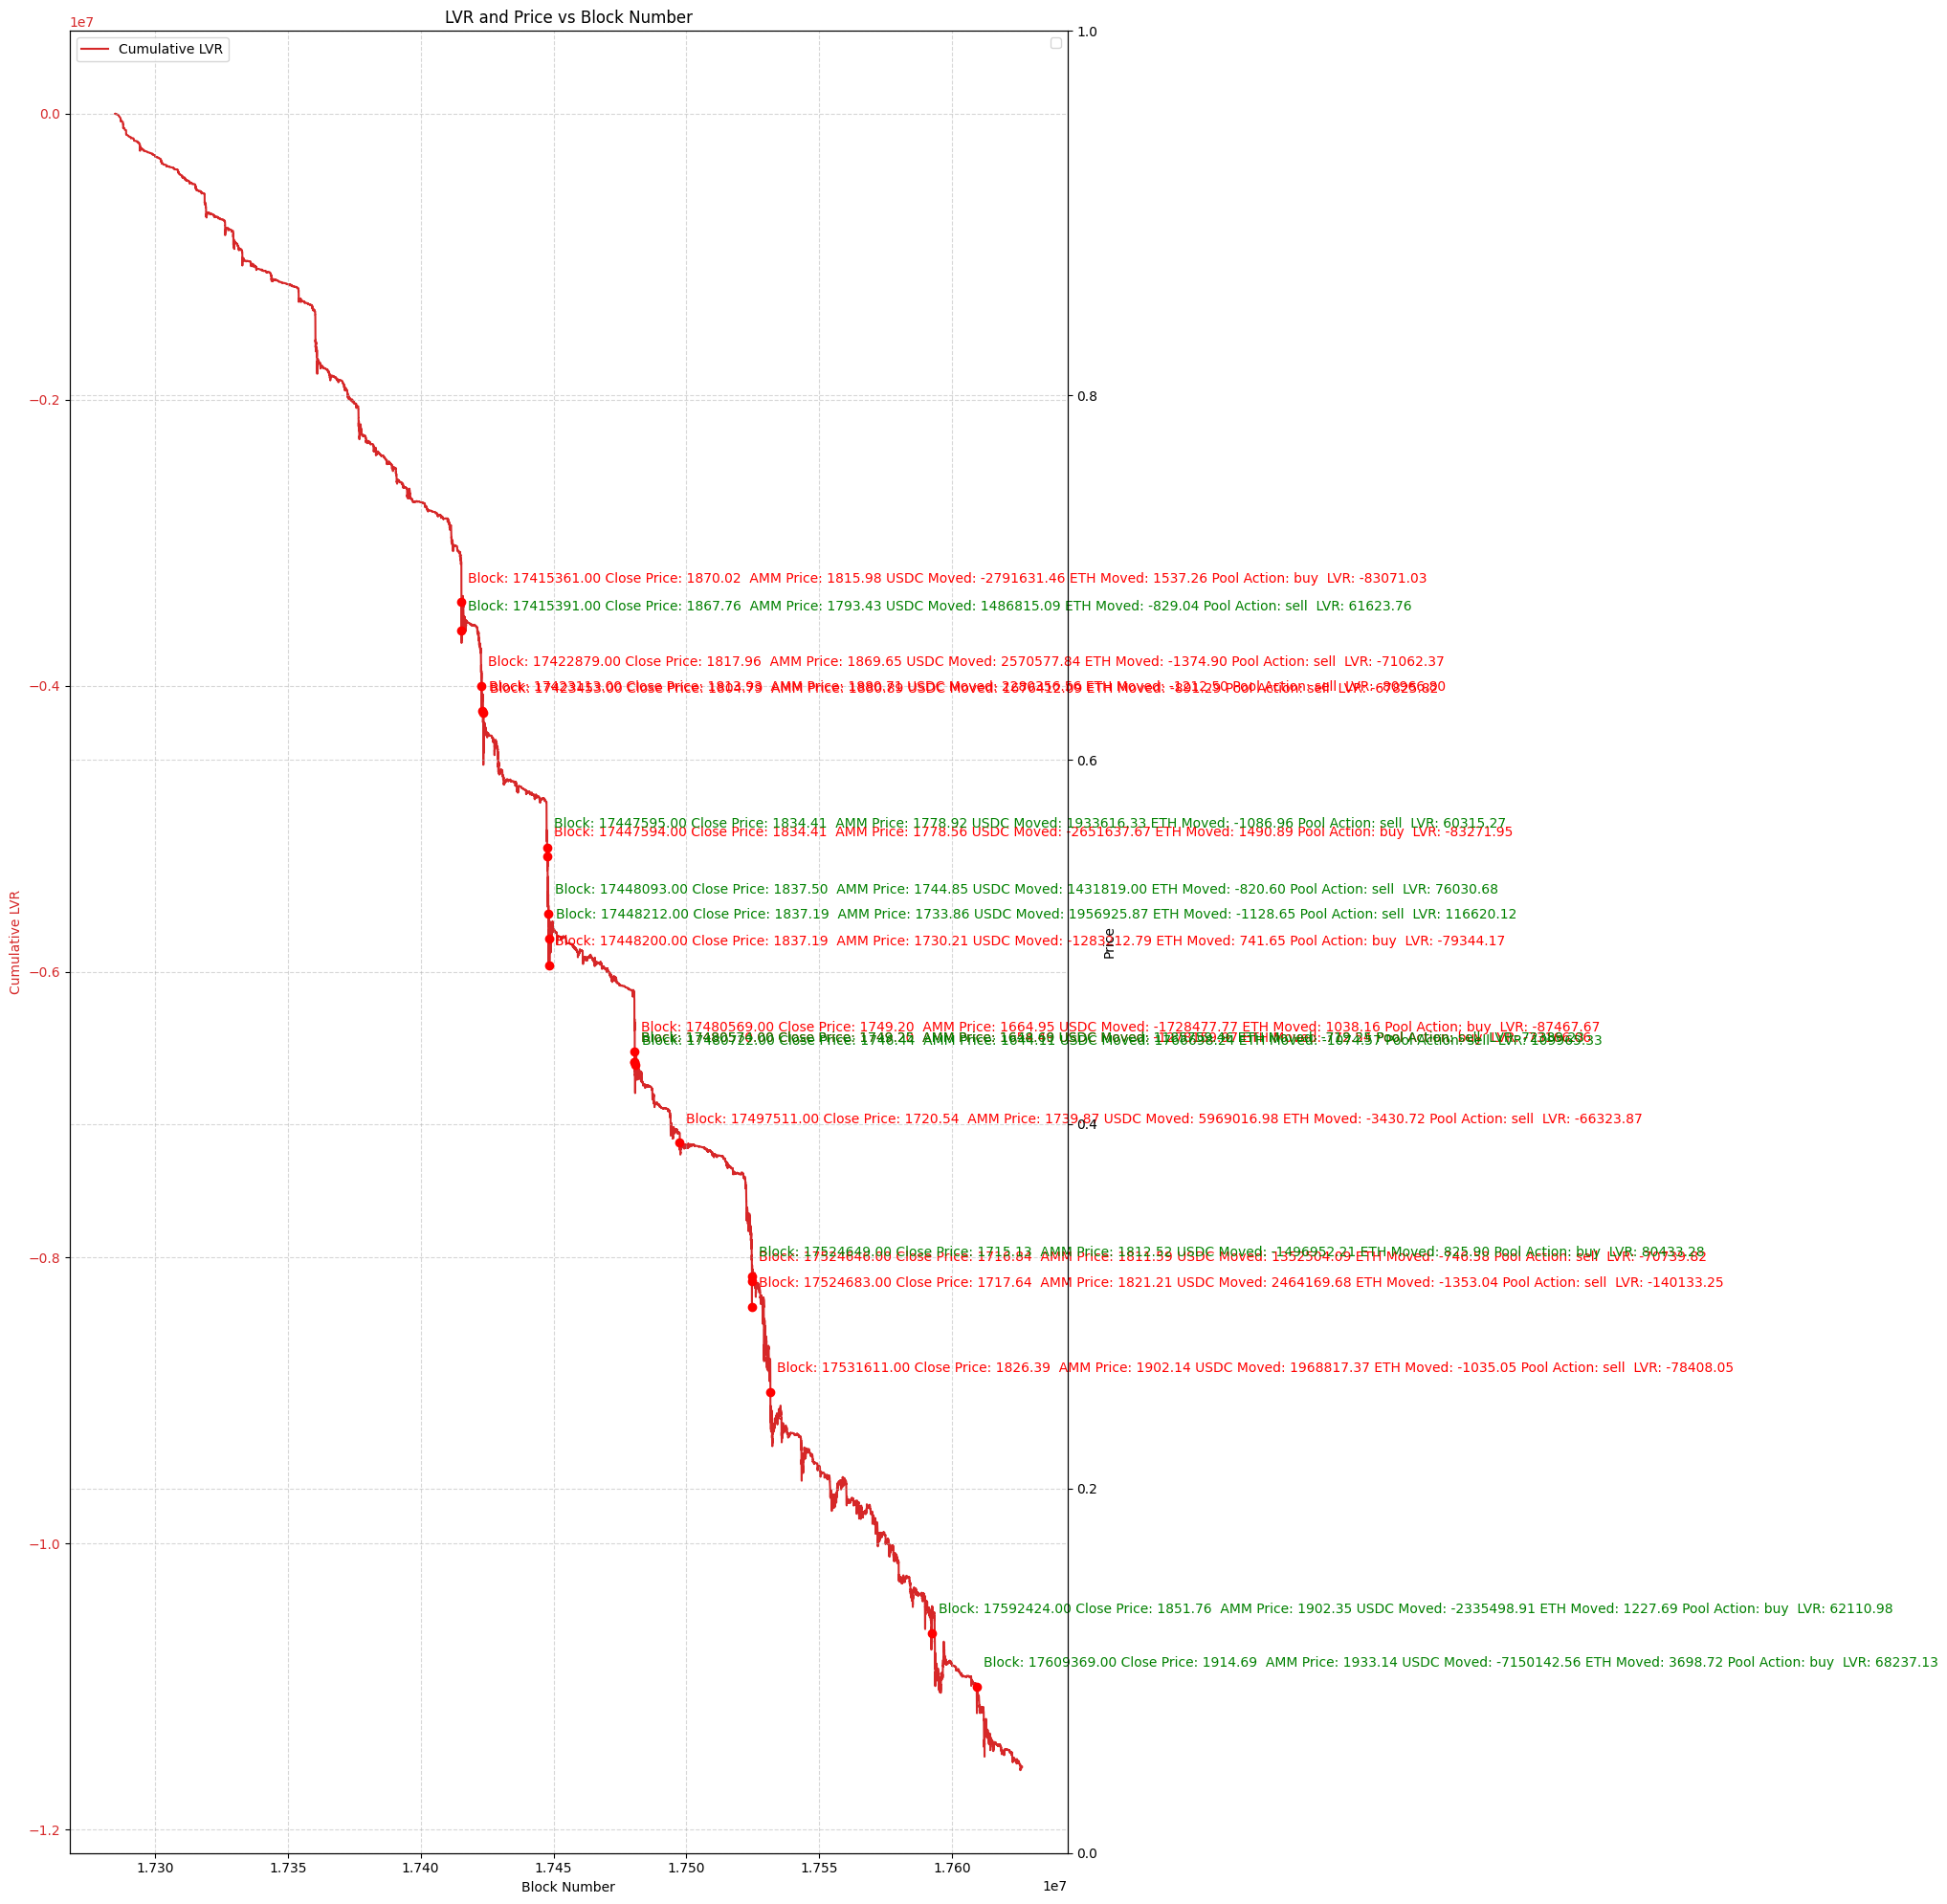

In [1333]:
import matplotlib.pyplot as plt

# Increase figure size
fig, ax1 = plt.subplots(figsize=(20, 20))

# Set colors for the lines
color1 = 'tab:red'
color2 = 'tab:blue'
color3 = 'tab:green'

# Plot the data
ax1.plot(merged['block_number'], merged['cum_LVR'], color=color1, label='Cumulative LVR', zorder=1)
ax1.set_xlabel('Block Number')
ax1.set_ylabel('Cumulative LVR', color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# ax2.plot(merged['block_number'], merged['AMM_price'], color=color2, label='AMM Price', zorder=1)
# ax2.plot(merged['block_number'], merged['Close_price'], color=color3, label='Close Price', zorder=1)
ax2.set_ylabel('Price', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set grid lines
ax1.grid(True, linestyle='--', alpha=0.5, zorder=0)
ax2.grid(True, linestyle='--', alpha=0.5, zorder=0)

# Set legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Set title
plt.title('LVR and Price vs Block Number')

# Annotate drastic LVR changes
threshold_change = 60000  # Define the threshold percentage for a drastic change (adjust as needed)

for i in range(1, len(merged)):
    lvr_change = abs(merged['cum_LVR'].iloc[i] - merged['cum_LVR'].iloc[i-1])
    if lvr_change > threshold_change:
        annotation_text = f"Block: {merged['block_number'].iloc[i]:.2f} Close Price: {merged['Close_price'].iloc[i]:.2f}  AMM Price: {merged['AMM_price'].iloc[i]:.2f} USDC Moved: {merged['amount_token0'].iloc[i]:.2f} ETH Moved: {merged['amount_token1'].iloc[i]:.2f} Pool Action: {merged['pool_action'].iloc[i]}  LVR: {merged['LVR'].iloc[i]:.2f}"
        ax1.plot(merged['block_number'].iloc[i], merged['cum_LVR'].iloc[i], 'ro', zorder=2)  # Add a red dot marker
        color = ''
        if merged['LVR'].iloc[i] > 0:
            color = 'green'
        else:
            color = 'red'

        ax1.annotate(annotation_text, xy=(merged['block_number'].iloc[i], merged['cum_LVR'].iloc[i]),
                     xytext=(5, 15), textcoords='offset points', color=color, ha='left', zorder=3)

fig.tight_layout()  # otherwise, the right y-label is slightly clipped
plt.show()


In [1326]:
# sum of LVR
merged['LVR'].sum()

-11561059.876465179

In [882]:
merged

,block_number,amount0,amount1,transaction_index,amount_token0,amount_token1,Price,timestamp,random,close,AMM_price,LVR,cum_LVR
0,17619769,-1.077014e+10,5.518087e+18,7,-10770.143513,5.518087,1952.808358,1688464094,9,1952.40,1951.789271,-3.370058,-3.370058
1,17619769,1.085832e+10,-5.557701e+18,10,10858.316787,-5.557701,1952.808358,1688464102,1,1952.40,1953.742605,-7.461797,-10.831855
2,17619779,-1.513387e+09,7.753807e+17,63,-1513.386854,0.775381,1952.808358,1688464227,8,1953.74,1951.798367,-1.505505,-12.337359
3,17619782,1.016229e+11,-5.201192e+19,0,101622.882399,-52.011919,1953.003639,1688464263,8,1953.74,1953.838361,-5.115970,-17.453329
4,17619784,1.144758e+11,-5.858487e+19,0,114475.773229,-58.584865,1953.198939,1688464290,5,1953.92,1954.016150,-5.632947,-23.086276
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,17625521,-1.572259e+07,8.117950e+15,28,-15.722592,0.008118,1937.830222,1688533892,3,1938.04,1936.768783,-0.010320,-44085.904440
2296,17625526,6.000000e+07,-3.094846e+16,67,60.000000,-0.030948,1937.830222,1688533951,4,1938.24,1938.707128,-0.014457,-44085.918897
2297,17625527,3.713780e+09,-1.915593e+18,9,3713.779571,-1.915593,1937.830222,1688533962,5,1938.24,1938.710581,-0.901442,-44086.820338
2298,17625527,4.044150e+08,-2.085996e+17,47,404.415000,-0.208600,1937.830222,1688533962,5,1938.24,1938.714352,-0.098950,-44086.919288


In [135]:
import requests

# Define the subgraph endpoint URL
subgraph_url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3'

# Define the query
query = '''
query($poolId: ID!, $startTime: Int!, $endTime: Int!) {
  pool(id: $poolId) {
    swaps(first:1000, where: { timestamp_gte: $startTime, timestamp_lte: $endTime }) {
      id
      timestamp
      amount0
      amount1
      sender
      tick
      token0 {
        symbol
        id
        decimals
      }
      token1 {
        symbol
        id
        decimals
      }
      sqrtPriceX96
      transaction {
      id
      blockNumber
      }
    }
  }
}
'''

# Define the request payload
payload = {
    'query': query,
    'variables': {
        'poolId': '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640',
        'startTime': 1685562594,
        'endTime': 1688154594    
    }
}

# Send the POST request to the subgraph endpoint
response = requests.post(subgraph_url, json=payload)

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    swaps = data['data']['pool']['swaps']
    
    # Process the retrieved swaps
    for swap in swaps[:10]:
        swap_id = swap['id']
        timestamp = swap['timestamp']
        amount0 = swap['amount0']
        amount1 = swap['amount1']
        sender = swap['sender']
        tick = swap['tick']
        token0_symbol = swap['token0']['symbol']
        token0_id = swap['token0']['id']
        token0_decimals = swap['token0']['decimals']
        token1_symbol = swap['token1']['symbol']
        token1_id = swap['token1']['id']
        token1_decimals = swap['token1']['decimals']
        sqrtPriceX96 = swap['sqrtPriceX96']
        transactin_id = swap['transaction']['id']
        blockNumber = swap['transaction']['blockNumber']

        # Calculate the prices
        price0 = float(amount1) / float(amount0) *-1
        price1 = float(amount0) / float(amount1) *-1
        price0_sqrt = ((float(sqrtPriceX96)/2**96)**2) / (10**float(token1_decimals) / 10**float(token0_decimals))
        price1_sqrt = 1 / price0_sqrt
        
        # Do something with the swap and price data
        print('Transaction ID:', transactin_id)
        print('Block Number:', blockNumber)
        print('Swap ID:', swap_id)
        print('Timestamp:', timestamp)
        print('Amount 0:', amount0)
        print('Amount 1:', amount1)
        print('Sender:', sender)
        print('Tick:', tick)
        print('Token 0 Symbol:', token0_symbol)
        print('Token 0 ID:', token0_id)
        print('Token 0 Decimals:', token0_decimals)
        print('Token 1 Symbol:', token1_symbol)
        print('Token 1 ID:', token1_id)
        print('Token 1 Decimals:', token1_decimals)
        print('Price 0:', price0)
        print('Price 1:', price1)
        print('Price 0 (sqrt):', price0_sqrt)
        print('Price 1 (sqrt):', price1_sqrt)
        print('---')
else:
    print('Error occurred while making the request. Status Code:', response.status_code)


Transaction ID: 0x000237dceda5381904ed2354dd9dcbaea725abbddf795286c8032ae0e94f41df
Block Number: 17507258
Swap ID: 0x000237dceda5381904ed2354dd9dcbaea725abbddf795286c8032ae0e94f41df#5097586
Timestamp: 1687098491
Amount 0: 35
Amount 1: -0.020161266214804987
Sender: 0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad
Tick: 201731
Token 0 Symbol: USDC
Token 0 ID: 0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
Token 0 Decimals: 6
Token 1 Symbol: WETH
Token 1 ID: 0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
Token 1 Decimals: 18
Price 0: 0.0005760361775658568
Price 1: 1736.0020758169699
Price 0 (sqrt): 0.0005763243154409208
Price 1 (sqrt): 1735.1341479231937
---
Transaction ID: 0x0002a4072a44bf8e13f9283a3df3b449017aedb275dddb728ead57496b36e700
Block Number: 17517034
Swap ID: 0x0002a4072a44bf8e13f9283a3df3b449017aedb275dddb728ead57496b36e700#5102435
Timestamp: 1687217099
Amount 0: -56.035514
Amount 1: 0.032322175171173751
Sender: 0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad
Tick: 201735
Token 0 Symbol: USDC
T

# Compare AMM Price to Binance Historical Klines (Closing Price every Minute)

In [197]:
import requests
import datetime
from binance.client import Client

def calculate_lvr_sum(pool_id, binance_symbol, subgraph_url):
    # # Create a Binance client
    # binance_client = Client()

    # # Get the historical klines from Binance
    # binance_klines = binance_client.get_historical_klines(binance_symbol, Client.KLINE_INTERVAL_1MINUTE, "1 day ago UTC")

    # # Extract the timestamps and prices from Binance klines
    klines_data = get_binance_klines(binance_symbol, 1688458860000, 1688545200000)

    binance_data = []

    for kline in klines_data:
        timestamp = int(kline[0]) // 1000  # Convert milliseconds to seconds
        price = float(kline[4])

        binance_data.append({
            'Timestamp_binance': timestamp,
            'Binance Price': price
        })

    # Get the start and end timestamps from Binance klines
    start_timestamp_binance = binance_data[0]['Timestamp_binance']
    end_timestamp_binance = binance_data[-1]['Timestamp_binance']

    # Convert timestamps to datetime objects
    start_datetime_binance = datetime.datetime.fromtimestamp(start_timestamp_binance)
    end_datetime_binance = datetime.datetime.fromtimestamp(end_timestamp_binance)

    print("Start Timestamp (Binance):", start_timestamp_binance)
    print("End Timestamp (Binance):", end_timestamp_binance)
    print("Start Datetime (Binance):", start_datetime_binance)
    print("End Datetime (Binance):", end_datetime_binance)

    # Define the subgraph query
    query = '''
    query($poolId: ID!, $startTime: Int!, $endTime: Int!) {
      pool(id: $poolId) {
        swaps(first: 1000, where: { timestamp_gte: $startTime, timestamp_lte: $endTime }) {
          id
          timestamp
          amount0
          amount1
          sqrtPriceX96
          sender
          tick
        token0 {
            symbol
            id
            decimals
        }
        token1 {
            symbol
            id
            decimals
        }
        }
      }
    }
    '''

    # Define the request payload for the subgraph
    subgraph_payload = {
        'query': query,
        'variables': {
            'poolId': pool_id,
            'startTime': start_timestamp_binance,
            'endTime': end_timestamp_binance,
        }
    }

    # Send the POST request to the subgraph endpoint
    subgraph_response = requests.post(subgraph_url, json=subgraph_payload)

    # Check if the subgraph request was successful
    if subgraph_response.status_code == 200:
        subgraph_data = subgraph_response.json()
        swaps = subgraph_data['data']['pool']['swaps']

        # Extract timestamps, prices, and amount0 from subgraph data
        subgraph_data = []
        for swap in swaps:
            timestamp = swap['timestamp']

            amount1 = float(swap['amount1'])
            amount0 = float(swap['amount0'])
            token0_symbol = swap['token0']['symbol']
            token0_id = swap['token0']['id']
            token0_decimals = swap['token0']['decimals']
            token1_symbol = swap['token1']['symbol']
            token1_id = swap['token1']['id']
            token1_decimals = swap['token1']['decimals']
            sqrtPriceX96 = swap['sqrtPriceX96'] # This is the price after the swap
            price = float(swap['amount0']) / float(swap['amount1']) * -1
            swap_id = swap['id']
            price0_sqrt = ((float(sqrtPriceX96)/2**96)**2) / (10**float(token1_decimals) / 10**float(token0_decimals))
            price1_sqrt = 1 / price0_sqrt

            subgraph_data.append({
                'Timestamp_subgraph': timestamp,
                'Swap Price': price,
                'After Swap Price': price1_sqrt,
                'Amount1': amount1,
                'Amount0': amount0,
                'Swap ID': swap_id
            })
    else:
        print('Error occurred while making the subgraph request. Status Code:', subgraph_response.status_code)
        subgraph_data = []

    # Compare the subgraph and Binance data
    output = []
    timestamps_seen = set()
    binance_timestamps_seen = set()

    for subgraph_item in subgraph_data:
        subgraph_timestamp = subgraph_item['Timestamp_subgraph']
        swap_price = subgraph_item['Swap Price']
        after_swap_price = subgraph_item['After Swap Price']
        subgraph_amount1 = subgraph_item['Amount1']
        subgraph_amount0 = subgraph_item['Amount0']
        subgraph_id = subgraph_item['Swap ID']

        for binance_item in binance_data:
            binance_timestamp = binance_item['Timestamp_binance']
            binance_price = binance_item['Binance Price']

            if abs(int(subgraph_timestamp) - int(binance_timestamp)) <= 30 and subgraph_timestamp not in timestamps_seen:
                LVR = -subgraph_amount1 * (binance_price - swap_price) 

                output.append({
                    'Swap ID': subgraph_id,
                    'Timestamp_subgraph': subgraph_timestamp,
                    'Timestamp_binance': binance_timestamp,
                    'Swap Price': swap_price,
                    'After Swap Price': after_swap_price,
                    'Binance Price': binance_price,
                    'Amount0': subgraph_amount0,
                    'Amount1': subgraph_amount1,
                    'LVR': LVR
                    # amount1 => if negative => token is leaving the pool or SELLING
                    # if positive, token is entering the pool or BUYING
                })
                timestamps_seen.add(subgraph_timestamp)
                binance_timestamps_seen.add(binance_timestamp)

    lvr_sum = 0

    for item in output:
        # print(item)

        lvr_sum += item['LVR']
    return lvr_sum, output

## USDC/ETH Pool 0.05% 

In [198]:
# Example usage
pool_id = '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640'
binance_symbol = 'ETHUSDC'
subgraph_url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3'

lvr_sum,data = calculate_lvr_sum(pool_id, binance_symbol, subgraph_url)
print("LVR Sum:", lvr_sum)

Start Timestamp (Binance): 1688458860
End Timestamp (Binance): 1688545200
Start Datetime (Binance): 2023-07-04 16:21:00
End Datetime (Binance): 2023-07-05 16:20:00
LVR Sum: -37969.817497332726


In [167]:
lvr_values = []
for item in data:
    if item['LVR'] > -10000:
        lvr_values.append(item['LVR'])

print(sum(lvr_values))

-15262.078405487477


In [152]:
# find this swap id in data
id = "0x144ff66f5fbabda6f05f2d138f90447c520c5280f1dd765a80c7e3d011842628"
for item in data:
    if item['Swap ID'].split('#')[0] == id:
        print(item)

## Visualising LVR Calculations to find outliers

Index: 845
Index - 1: {'Swap ID': '0x55497563dddad9efbe117e87bc8d88aaca8837e0c04fa11e0acc917fe2c70d04#5173487', 'Timestamp_subgraph': '1688535191', 'Timestamp_binance': 1688535161, 'Swap Price': 1938.8699759582344, 'After Swap Price': 1937.900770331068, 'Binance Price': 1938.11, 'Amount0': 250.0, 'Amount1': -0.12894108583864383, 'LVR': -0.09799212526601551} 2023-07-05 13:33:11 2023-07-05 13:32:41
{'Swap ID': '0x0c17b57c8f46918c1fc93d05c823fe659b5fc3dee664b08d8de91881991e336e#5173494', 'Timestamp_subgraph': '1688535563', 'Timestamp_binance': 1688535533, 'Swap Price': 1931.4577551578398, 'After Swap Price': 1927.6541285387946, 'Binance Price': 1935.52, 'Amount0': -5246425.100143, 'Amount1': 2716.3033134598686, 'LVR': -11034.289124845081} 2023-07-05 13:39:23 2023-07-05 13:38:53
Index + 1: {'Swap ID': '0x1a868296291fdda87affa3dd671399e81608f8764913e51644bbe2e36c396760#5173499', 'Timestamp_subgraph': '1688535575', 'Timestamp_binance': 1688535545, 'Swap Price': 1935.7886360110554, 'After Swa

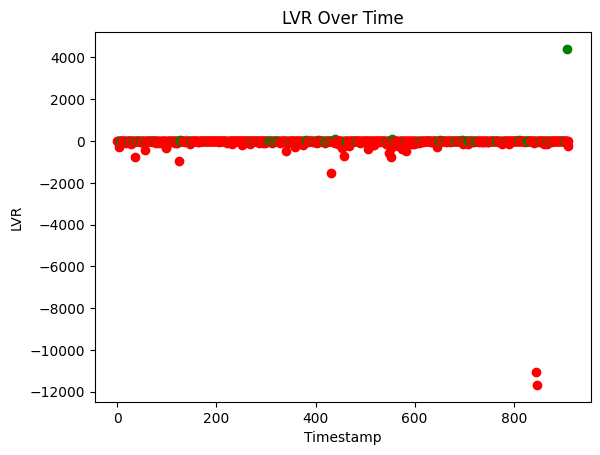

In [168]:
import matplotlib.pyplot as plt

lvr_values = []

#sort data by timestamp
data.sort(key=lambda x: x['Timestamp_subgraph'])

for item in data:
    # if item['LVR'] > -10000:
    #     lvr_values.append(item['LVR'])
    lvr_values.append(item['LVR'])
    if item['LVR'] < -10000:
        # print the items before and after this given item
        index = data.index(item)
        print("Index:", index)
        
        print("Index - 1:", data[index-1], datetime.datetime.fromtimestamp(int(data[index-1]['Timestamp_subgraph'])), datetime.datetime.fromtimestamp(int(data[index-1]['Timestamp_binance'])))
        print(item, datetime.datetime.fromtimestamp(int(item['Timestamp_subgraph'])), datetime.datetime.fromtimestamp(int(item['Timestamp_binance'])))
        print("Index + 1:", data[index+1], datetime.datetime.fromtimestamp(int(data[index+1]['Timestamp_subgraph'])), datetime.datetime.fromtimestamp(int(data[index+1]['Timestamp_binance'])))
        

# Create x-axis values (e.g., timestamps or indices)
x_values = range(len(lvr_values))

# Plot the LVR values
for i in range(len(lvr_values)):
    if lvr_values[i] >= 0:
        plt.plot(x_values[i], lvr_values[i], marker='o', color='green')
    else:
        plt.plot(x_values[i], lvr_values[i], marker='o', color='red')

# Set labels and title
plt.xlabel('Timestamp')
plt.ylabel('LVR')
plt.title('LVR Over Time')

# Show the plot
plt.show()


Outliers on this chart less than -10000 are both MEV Transactions. We must account for these transactions. 

## ETH/GRT Pool 0.3%

In [125]:
lvr_sum,data = calculate_lvr_sum("0x0e2c4be9f3408e5b1ff631576d946eb8c224b5ed", "GRTETH", subgraph_url)
print("LVR Sum:", lvr_sum)

Start Timestamp (Binance): 1688449680
End Timestamp (Binance): 1688536020
Start Datetime (Binance): 2023-07-04 13:48:00
End Datetime (Binance): 2023-07-05 13:47:00
LVR Sum: -0.12747396289966512


In [98]:
import ccxt
from pprint import pprint

print('CCXT Version:', ccxt.__version__)

exchange = ccxt.binance()
timestamp = 1688484515000
response = exchange.fetch_ohlcv('ETH/USDC', '1m', timestamp, 1)
pprint(response)

CCXT Version: 4.0.5
[[1688484540000, 1952.74, 1953.4, 1952.24, 1953.4, 1.8629]]


In [209]:
import requests
import datetime
import ccxt
from pprint import pprint

def calculate_lvr_sum(pool_id, ccxt_symbol, subgraph_url):
    # Create a CCXT exchange instance
    exchange = ccxt.binance()

    # Get the start and end timestamps for the past 24 hours
    end_timestamp_ccxt = int(datetime.datetime.now().timestamp()) * 1000  # Current timestamp in milliseconds
    # start_timestamp_ccxt = end_timestamp_ccxt - 24 * 60 * 60 * 1000  # Subtract 24 hours in milliseconds
    start_timestamp_ccxt = end_timestamp_ccxt - 24 * 60 * 60 * 1000  # Subtract 24 hours in milliseconds

    # Convert timestamps to datetime objects
    start_datetime_ccxt = datetime.datetime.fromtimestamp(start_timestamp_ccxt // 1000)
    end_datetime_ccxt = datetime.datetime.fromtimestamp(end_timestamp_ccxt // 1000)

    print("Start Timestamp (CCXT):", start_timestamp_ccxt)
    print("End Timestamp (CCXT):", end_timestamp_ccxt)
    print("Start Datetime (CCXT):", start_datetime_ccxt)
    print("End Datetime (CCXT):", end_datetime_ccxt)

    # Define the subgraph query and request payload
    query = '''
    query($poolId: ID!, $startTime: Int!, $endTime: Int!) {
      pool(id: $poolId) {
        swaps(first: 1000, where: { timestamp_gte: $startTime, timestamp_lte: $endTime }) {
          id
          timestamp
          amount0
          amount1
          sqrtPriceX96
          sender
          tick
        }
      }
    }
    '''

    subgraph_payload = {
        'query': query,
        'variables': {
            'poolId': pool_id,
            'startTime': start_timestamp_ccxt // 1000,
            'endTime': end_timestamp_ccxt // 1000,
        }
    }

    # Send the POST request to the subgraph endpoint
    subgraph_response = requests.post(subgraph_url, json=subgraph_payload)

    # Check if the subgraph request was successful
    if subgraph_response.status_code == 200:
        subgraph_data = subgraph_response.json()
        swaps = subgraph_data['data']['pool']['swaps']
        # Extract timestamps from subgraph data
        subgraph_timestamps = [swap['timestamp'] for swap in swaps]
        
    else:
        print('Error occurred while making the subgraph request. Status Code:', subgraph_response.status_code)
        subgraph_timestamps = []

    # Fetch pricing data from CCXT based on subgraph timestamps
    ccxt_data = []
    for subgraph_timestamp in subgraph_timestamps:
        response = exchange.fetch_ohlcv(ccxt_symbol, '1m', int(subgraph_timestamp) * 1000, 1)
        
        if len(response) > 0:
            timestamp = response[0][0] // 1000
            price = response[0][4]
            ccxt_data.append({
                'Timestamp_ccxt': timestamp,
                'CCXT Price': price
            })
    
    

    # Compare the subgraph and CCXT data
    output = []
    subgraph_timestamps_seen = set()
    ccxt_timestamps_seen = set()

    for swap in swaps:
        subgraph_timestamp = swap['timestamp']
        # subgraph_price = float(swap['amount0']) / float(swap['amount1']) * -1
        subgraph_price = (1/((float(swap['sqrtPriceX96']) / (2 ** 96))**2)) * 10 ** 12
        subgraph_amount1 = float(swap['amount1'])

        for ccxt_item in ccxt_data:
            ccxt_timestamp = ccxt_item['Timestamp_ccxt']
            ccxt_price = ccxt_item['CCXT Price']

            if abs(int(subgraph_timestamp) - int(ccxt_timestamp)) <= 30 and subgraph_timestamp not in subgraph_timestamps_seen and ccxt_timestamp not in ccxt_timestamps_seen:
                
                LVR = -subgraph_amount1 * (ccxt_price - subgraph_price) 

                output.append({
                    'Timestamp_subgraph': subgraph_timestamp,
                    'Timestamp_ccxt': ccxt_timestamp,
                    'Subgraph Price': subgraph_price,
                    'CCXT Price': ccxt_price,
                    'Amount1': subgraph_amount1,
                    'LVR': LVR
                })
                subgraph_timestamps_seen.add(subgraph_timestamp)
                ccxt_timestamps_seen.add(ccxt_timestamp)

    lvr_sum = sum(item['LVR'] for item in output)
    return lvr_sum, output


# Example usage
pool_id = '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640'
ccxt_symbol = 'ETH/USDC'
subgraph_url = 'https://api.thegraph.com/subgraphs/name/uniswap/uniswap-v3'

lvr_sum, data = calculate_lvr_sum(pool_id, ccxt_symbol, subgraph_url)
print("LVR Sum:", lvr_sum)


Start Timestamp (CCXT): 1688405273000
End Timestamp (CCXT): 1688491673000
Start Datetime (CCXT): 2023-07-04 01:27:53
End Datetime (CCXT): 2023-07-05 01:27:53
LVR Sum: -19606.223162050435
